In [8]:
path = 'C:/Users/Marie/Desktop/Bike Sharing'

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from os import listdir
from sklearn.preprocessing import MinMaxScaler

In [10]:
print(listdir(path + '/Data'))

['day.csv', 'hour.csv', 'Readme.txt']


In [11]:
data_day = pd.read_csv(path + '/Data/day.csv')

In [12]:
data_hour = pd.read_csv(path + '/Data/hour.csv')

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [13]:
data_day.dteday = pd.to_datetime(data_day.dteday)
data_hour.dteday = pd.to_datetime(data_hour.dteday)

data_day['casual_scaled'] = 0

data_day['registered_scaled'] = 0

data_day['cnt_scaled'] = 0

In [14]:
data_day[['casual_scaled', 'registered_scaled', 'cnt_scaled']] = MinMaxScaler().fit_transform(data_day[['casual', 'registered', 'cnt']])

In [15]:
data_day = data_day.set_index('dteday', drop = True)

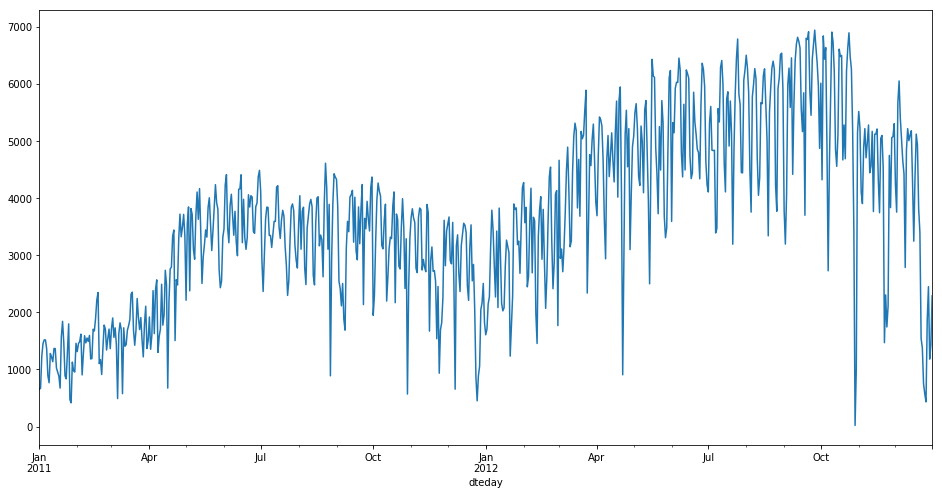

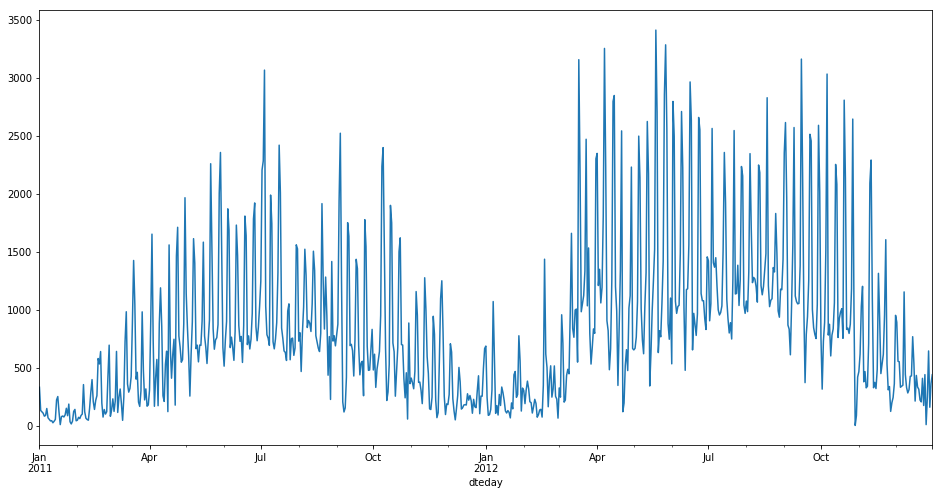

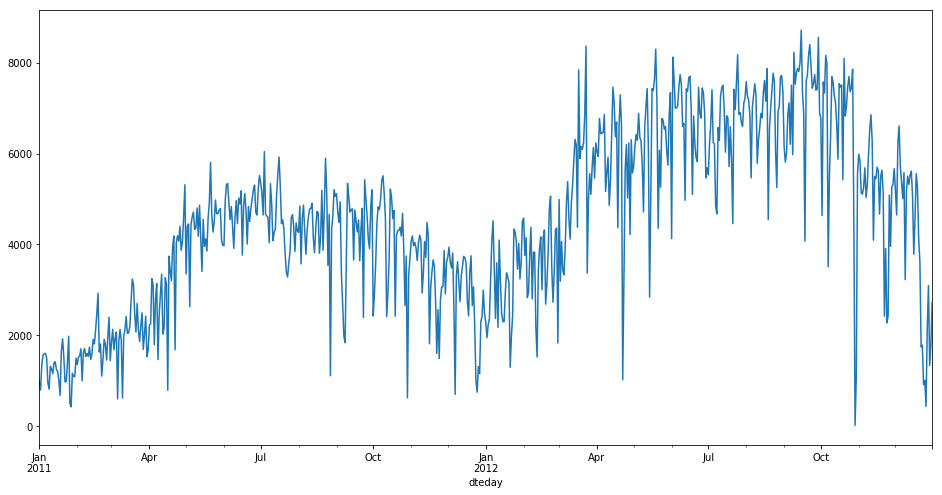

In [16]:
for col in ['registered', 'casual', 'cnt']:
    data_day[col].plot(figsize = (16,8))
    plt.show()

In [17]:
data_day.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,casual_scaled,registered_scaled,cnt_scaled
dteday,,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0.096538,0.091539,0.110792
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0.037852,0.093849,0.089623
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0.034624,0.174560,0.152669
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0.031103,0.207046,0.177174
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0.023474,0.216286,0.181546


In [18]:
def plot_aggregated_data(data = data_day, aggregated_variable = 'weekday', features = ['casual', 'registered', 'cnt']):
    """
    Plotting aggregated bar charts
    """
    aggregation = {i:[min, max, np.mean, np.median] for i in features}
    
    agg_data = data.groupby(aggregated_variable).agg(aggregation)
    
    for ft in features:
        agg_data[ft].plot(kind = 'bar', figsize = (16,8), title = ft)
        plt.show()

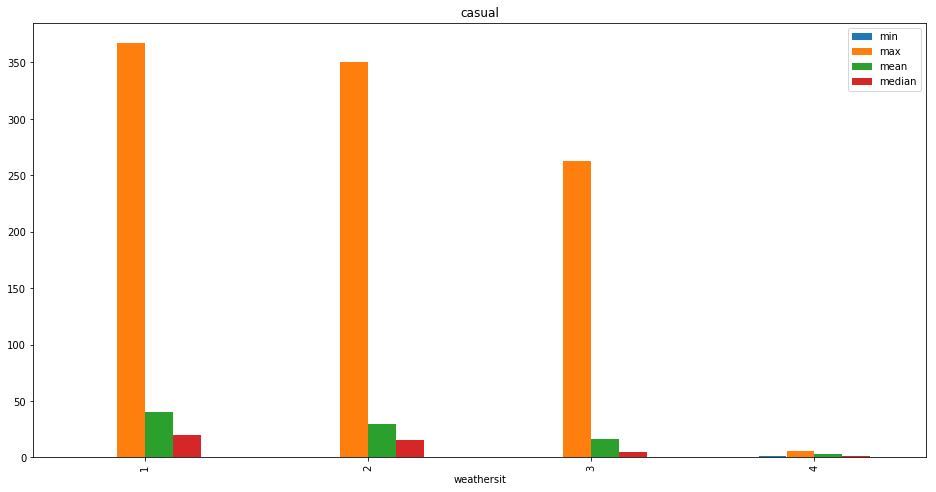

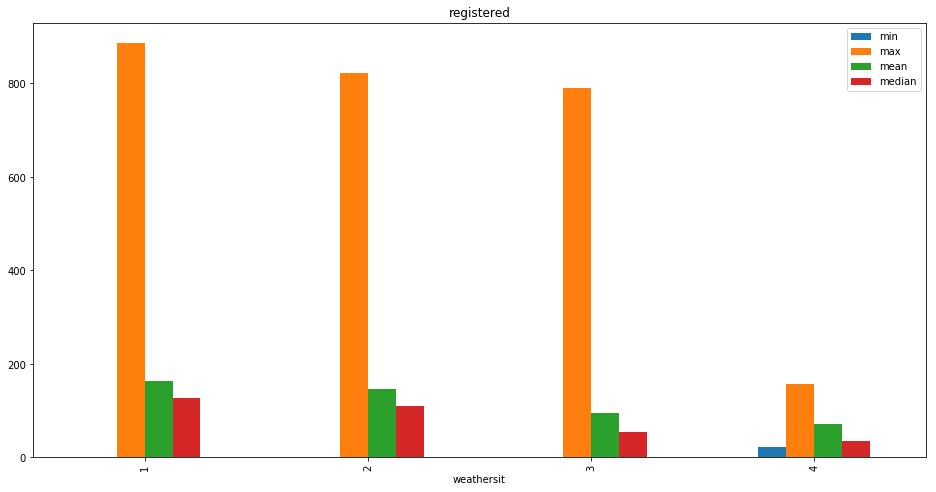

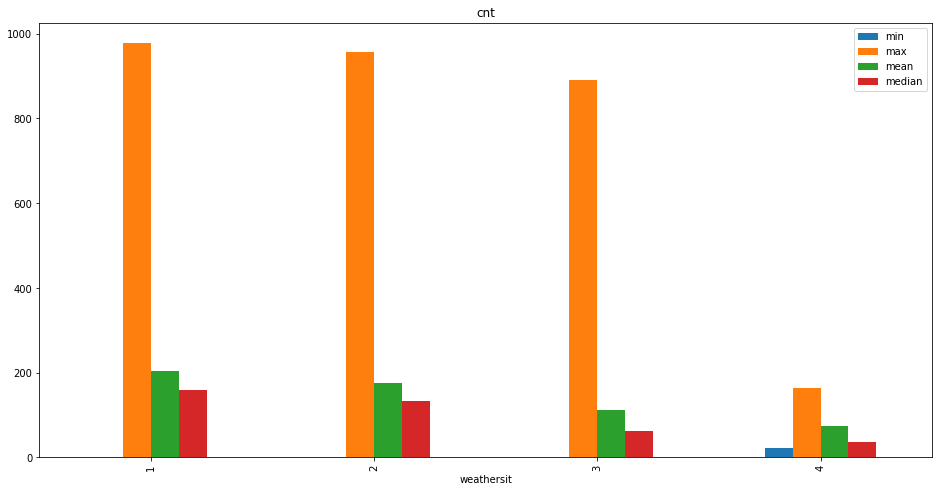

In [19]:
plot_aggregated_data(data = data_hour, aggregated_variable='weathersit')

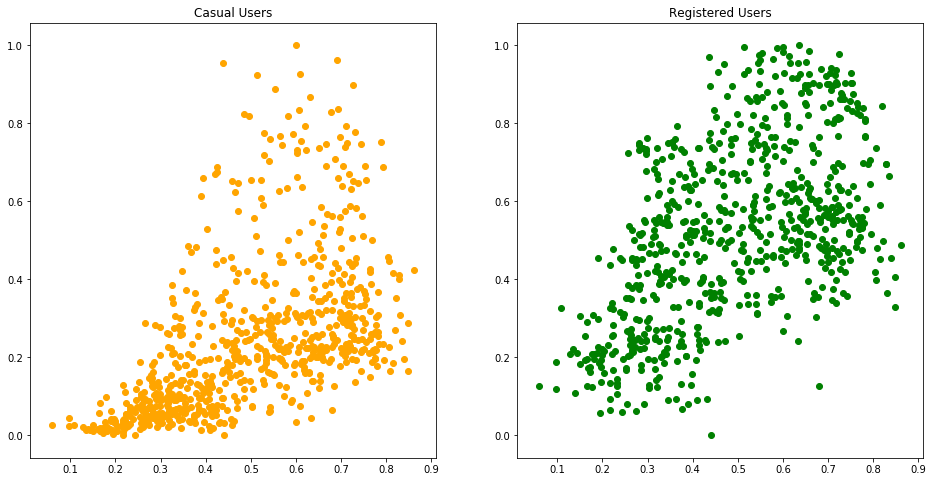

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,8))
ax1.scatter(data_day.temp, data_day.casual_scaled, color = 'orange')
ax1.set_title('Casual Users')
ax2.scatter(data_day.temp, data_day.registered_scaled, color = 'green')
ax2.set_title('Registered Users')
plt.show()

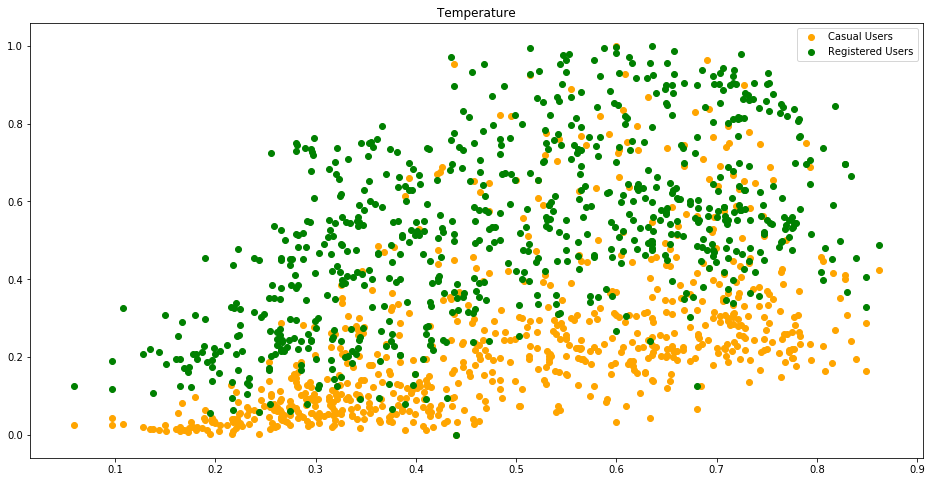

In [21]:
plt.figure(figsize = (16,8))
plt.scatter(data_day.temp, data_day.casual_scaled, c = 'orange')
plt.scatter(data_day.temp, data_day.registered_scaled, c = 'green')
plt.legend(['Casual Users', 'Registered Users'])
plt.title('Temperature')
plt.show()

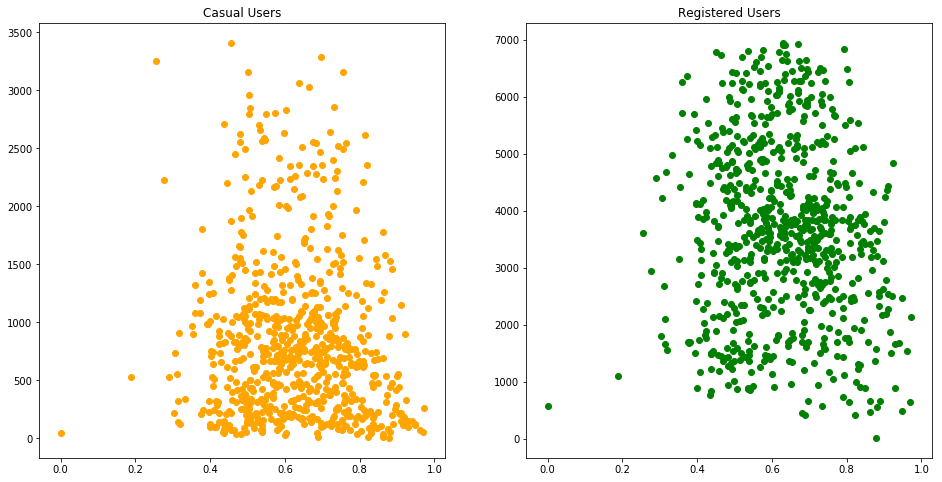

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,8))
ax1.scatter(data_day.hum, data_day.casual, color = 'orange')
ax1.set_title('Casual Users')
ax2.scatter(data_day.hum, data_day.registered, color = 'green')
ax2.set_title('Registered Users')
plt.show()

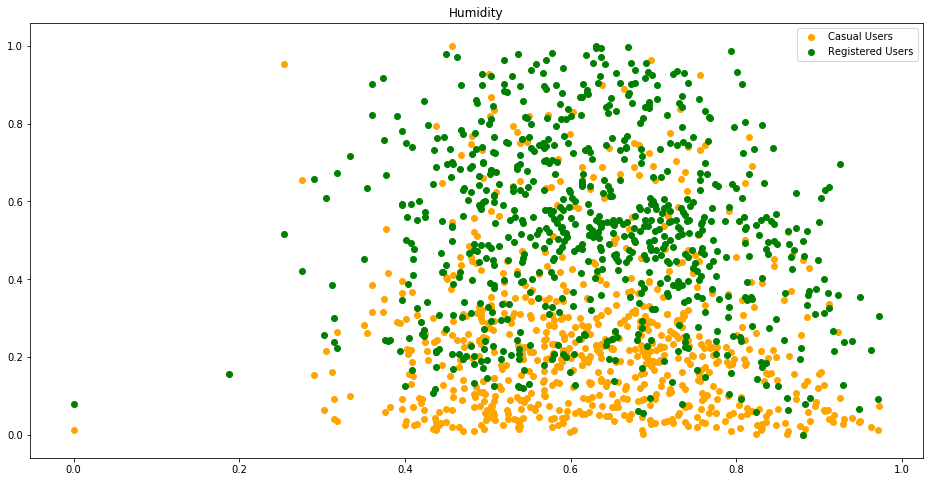

In [23]:
plt.figure(figsize = (16,8))
plt.scatter(data_day.hum, data_day.casual_scaled, c = 'orange')
plt.scatter(data_day.hum, data_day.registered_scaled, c = 'green')
plt.legend(['Casual Users', 'Registered Users'])
plt.title('Humidity')
plt.show()

In [24]:
data_day['hum_bin'] = ((data_day.hum *20).astype(int)/20.)

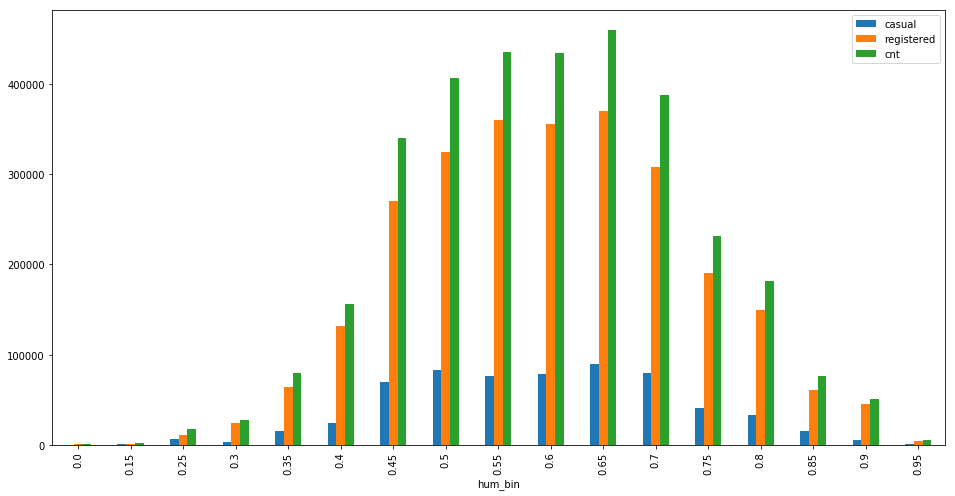

In [25]:
agg_hum = data_day[['hum_bin', 'casual', 'registered', 'cnt']].groupby('hum_bin').sum()
agg_hum.plot(kind = 'bar', figsize = (16,8))
#for col in agg_hum.columns :
#    agg_hum[col].plot(kind = 'bar', figsize = (16,8))
#    plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(data_day[['temp', 'hum']], day['cnt'])

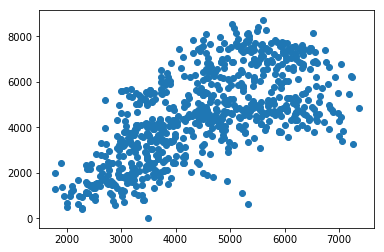

In [22]:
plt.scatter(model.predict(data_day[['temp', 'hum']]), day['cnt'])
plt.show()

In [30]:
np.corrcoef(data_day['casual'], data_day['registered'])

array([[ 1.        ,  0.39528245],
       [ 0.39528245,  1.        ]])

In [31]:
data_day.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,casual_scaled,registered_scaled,cnt_scaled,hum_bin
dteday,,,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0.096538,0.091539,0.110792,0.80
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0.037852,0.093849,0.089623,0.65
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0.034624,0.174560,0.152669,0.40
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0.031103,0.207046,0.177174,0.55
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0.023474,0.216286,0.181546,0.40
